# Customer Churn Prediction using Logistic Regression

# 1. Aims, objectives and background

## 1.1. Introduction

DQLab Telco is a Telco company that has many branches everywhere. Since its establishment in 2019, DQLab Telco has been consistent in paying attention to its customer experience so that customers will not leave it.

In 3 years, DQLab Telco already has a lot of customers who have switched subscriptions to competitors. The management wants to reduce the number of churn customers by using machine learning.

## 1.2. Aims and objectives

Within this project, I would like to explore the following:

- Getting insight from the data 
- Using logistic regression techniques to model the customer churn
## 1.3. Steps of the project
1. Prepocess data and engineer additional features for analysis
2. Exploratory data analysis
3. Modelling
4. Conclusions

## 1.4. Dataset

### Data selection

 dataset is obtained from this [dataset](https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv) of DQLab. Since all data requested from DQLab is public data (which everyone on the Internet can see on Youtube), there is no particular privacy issues as far as I am concerned. In addition, the data is obtained only for research purposes in this case and not for any commercial interests.



In [1]:
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Machine Learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 2. Preprocessing the data

## Import the Dataset

In [3]:
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


### For :
- UpdatedAt Periode of Data taken

- customerID Customer ID

- ender Whether the customer is a male or a female (Male, Female)

- SeniorCitizen Whether the customer is a senior citizen or not (Yes, No)

- Partner Whether the customer has a partner or not (Yes, No)

- tenure Number of months the customer has stayed with the company

- PhoneService Whether the customer has a phone service or not (Yes, No)

- InternetService Customer’s internet service provider (Yes, No)

- StreamingTV Whether the customer has streaming TV or not (Yes, No)

- PaperlessBilling Whether the customer has paperless billing or not (Yes, No)

- MonthlyCharges The amount charged to the customer monthly

- TotalCharges The total amount charged to the customer

- Churn Whether the customer churned or not (Yes, No)

## Preprocessing & Feature engineering

To be able to make use of the data for analysis, we need to perform a few pre-processing steps. Firstly, I would like drop unnecessary column.

In [4]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)


Use the data from the previous results *cleaned_df*, then change the string data into a numeric form using LabelEncoder(). After that use describe() to see a description of the data.

In [5]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

cleaned_df.describe()

C:\Users\HEWLET~1\AppData\Local\Temp/ipykernel_14688/2206411960.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue


,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.415827,0.903741,0.384317,0.783453,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.561336,0.294967,0.486468,0.411921,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


divide the dataset into 2 parts (70% training & 30% testing) based on the predictor variable (X) and the target (Y). Use train_test_split() to split the data. Include value_counts to check if the divisions are equidistant. Save the result of splitting the data into x_train, y_train, x_test & y_test

In [6]:
# Predictor dan target
X = cleaned_df.drop('Churn',axis=1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# Print according to the expected result
print('The number of rows and columns of x_train :',x_train.shape,', while the Number of rows and columns of y_train:',y_train.shape)
print('data training churn rate:')
print(y_train.value_counts(normalize=True))
print('The number of rows and columns of x_test:',x_test.shape,', while the Number of rows and columns of y_test:',y_test.shape)
print('data testing churn rate:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of x_train : (4865, 10) , while the Number of rows and columns of y_train: (4865,)
data training churn rate:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
The number of rows and columns of x_test: (2085, 10) , while the Number of rows and columns of y_test: (2085,)
data testing churn rate:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


After further analysis, it turns out that there are columns that are not needed in the model, namely the customer ID number (customerID) & the data collection period (UpdatedAt), so this needs to be deleted. Then change the value of the data that is still in string value into numeric through encoding, after that it can be seen that the distribution of the data, especially the min and max columns of each variable, has changed to 0 & 1. The last step is to divide the data into 2 parts for modeling purposes, After that, it can be seen that the number of rows and columns of each data is appropriate & the percentage of the churn column is also the same as the data at the beginning, this indicates that the data is separated properly and correctly.

## Exploratory Data Analysis

In this section, we want to analyze and investigate data sets and understanding better about the data

### Percentage of Churn 

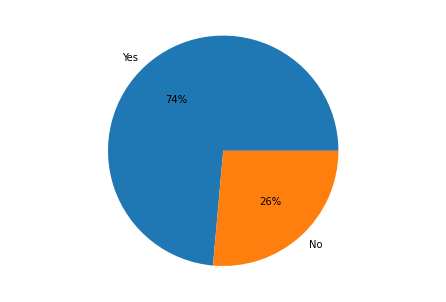

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels= labels, autopct='%.0f%%')
plt.show()

we can see that the overall distribution of customer data are not churn, with details of Churn as much as 26% and Not Churn as much as 74%.

### Numerical Value EDA

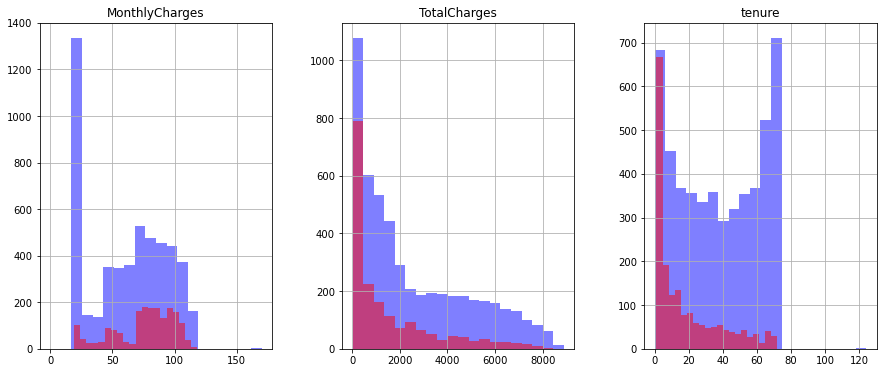

In [11]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='red', alpha=0.5, ax=ax)
plt.show()

we can see that for MonthlyCharges there is a tendency that the smaller the monthly fee charged, the smaller the tendency to Churn. For TotalCharges, there seems to be no trend towards Churn customers. For tenure, there is a tendency that the longer the customer subscribes, the smaller the tendency to Churn.

### Categorical Value EDA

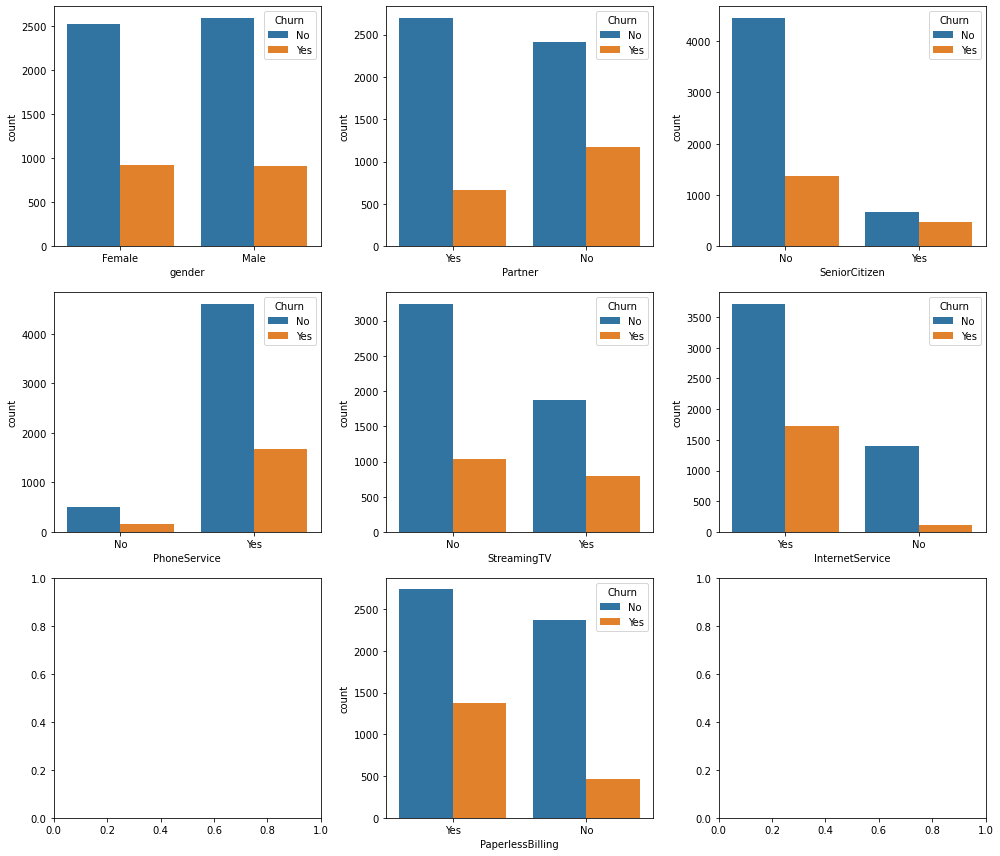

In [19]:
fig,ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load,x='gender',hue='Churn',ax=ax[0][0])
sns.countplot(data=df_load,x='Partner',hue ='Churn',ax=ax[0][1])
sns.countplot(data=df_load,x='SeniorCitizen',hue='Churn',ax=ax[0][2])
sns.countplot(data=df_load,x='PhoneService',hue='Churn',ax=ax[1][0])
sns.countplot(data=df_load,x='StreamingTV',hue='Churn',ax=ax[1][1])
sns.countplot(data=df_load,x='InternetService',hue='Churn',ax=ax[1][2])
sns.countplot(data=df_load,x='PaperlessBilling',hue='Churn',ax=ax[2][1])
plt.tight_layout()
plt.show()

we can see that there is no significant difference for people doing churn in terms of gender and telephone service. However, there is a tendency that people who churn are not having partners (partners: No), people whose status is senior citizens (SeniorCitizen: Yes), people who have TV streaming services (StreamingTV: Yes) , people who have Internet service (internetService: Yes) and people whose bills are paperless (PaperlessBilling: Yes).

# Modelling

### Logistic Regression

In [20]:
log_model = LogisticRegression().fit(x_train, y_train)

from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.80      0.79      4865



D:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


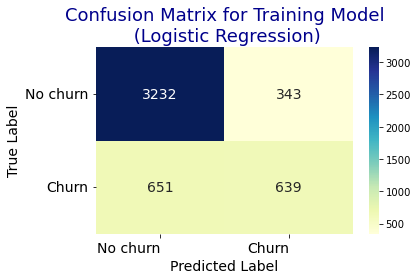

In [23]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)),('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n (Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label',fontsize=14)
plt.tight_layout()
plt.show()

From the training data,the model able to predict the data with an accuracy of 80%, this model is good enough to predict our data testing

In [21]:
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



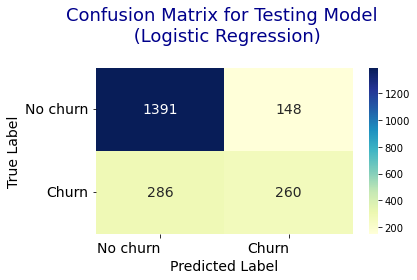

In [22]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Model \n (Logistic Regression)\n ', fontsize=18, color='darkblue')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.tight_layout()
plt.show()

From the data testing, the model can predict the data by producing an accuracy of 79%, with details of the correct churn guess, the churn is 260, the non-churn guess that doesn't actually churn is 1391, the non-churn guess that actually churn is 286 and the wrong churn guess, that actually not churn is 148.

## Conclusions

In this project, we have explored the churn customer on dqlab telco. the informnation that we get:
- For MonthlyCharges, there is a tendency that the smaller the monthly fee charged, the smaller the tendency to Churn.
- For tenure, there is a tendency that the longer the customer subscribes, the smaller the tendency to Churn.
- there is a tendency that people who churn are not having partners or Senior Citizen or people who have TV streaming services or people who have Internet service or people whose bills are paperless

We can use logistic regression model to predict if the customer will churn or not, because the accuracy of the model is around 79%

### References/ Resources used:

[1] DQLab telco dataset. Avaiable at https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv

